In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('NTasaDeMortalidadInfantil.csv')

In [3]:
train.head(100)

,Id,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate,Mortality level
0,1,Peru,1957,Female,20700,"4656,563","4,445338762",Alto
1,2,Peru,1958,Female,20439,"4785,706","4,270843215",Alto
2,3,Peru,1959,Female,20229,"4920,069","4,111527704",Alto
3,4,Peru,1960,Female,20014,"5060,097","3,955260146",Alto
4,5,Peru,1961,Female,19799,"5205,996","3,803114716",Alto
...,...,...,...,...,...,...,...,...
95,96,Peru,1989,Male,8469,"10754,407","0,787491119",Medio
96,97,Peru,1990,Male,7941,"10978,391","0,72333004",Medio
97,98,Peru,1991,Male,7419,"11202,378","0,6622701",Medio
98,99,Peru,1992,Male,6881,"11425,842","0,602231328",Medio


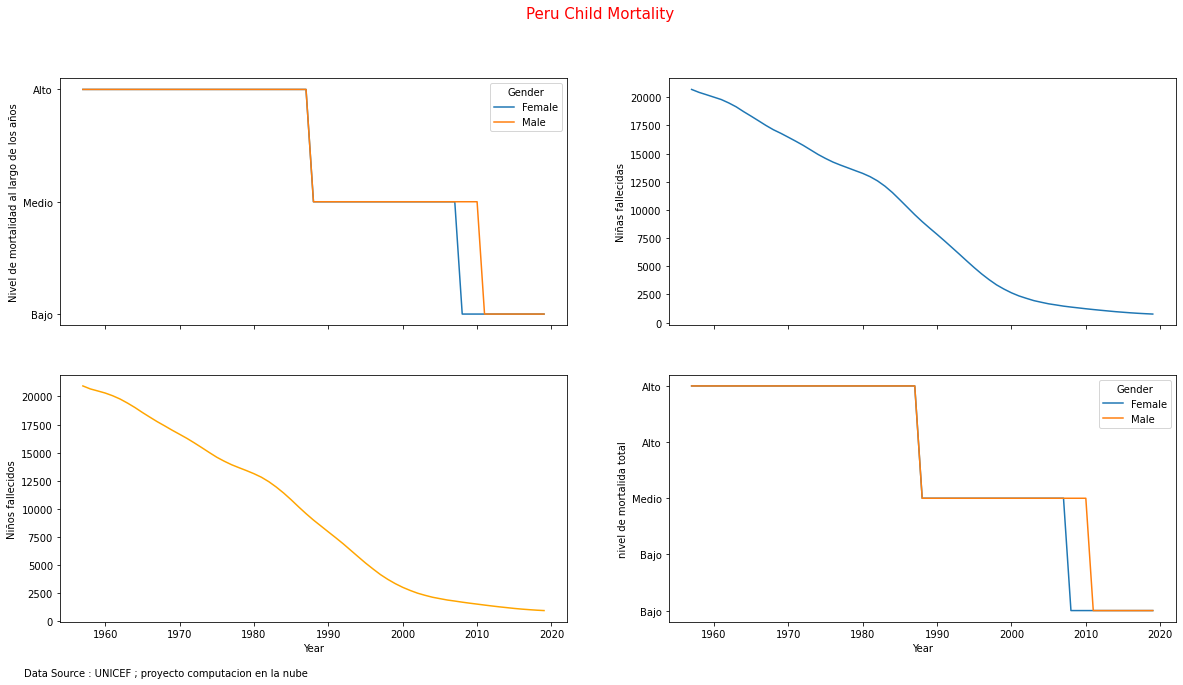

In [14]:
def plotchildmortality(country):
    fig, axs = plt.subplots(2,2, sharex=True, figsize=[20,10] )
    a = country+" Child Mortality"
    fig.suptitle(a, fontsize=15, color='red')
    axs[0,0].set_ylabel('Nivel de mortalidad al largo de los años')
    sns.lineplot(ax=axs[0,0], data=train[train.Country == country], x='Year' , y='Mortality level', hue='Gender' )
    axs[0,1].set_ylabel('Niñas fallecidas')
    sns.lineplot(ax=axs[0,1], data=train[(train.Country == country) & (train.Gender=='Female')], x='Year', y='Child Mortality(1 to 4)')
    axs[1,0].set_ylabel('Niños fallecidos')
    sns.lineplot(ax=axs[1,0], data=train[(train.Country == country) & (train.Gender=='Male')], x='Year', y='Child Mortality(1 to 4)',  color='orange')
    axs[1,1].set_ylabel('nivel de mortalida total')
    axs[1,1].set_yticks(np.arange(0.0,5.0,0.5))
    sns.lineplot(ax=axs[1,1], data=train[(train.Country == country) & (train.Gender !='Total')], x='Year', y='Mortality level', hue='Gender')
    fig.text(.1,.05,'Data Source : UNICEF ; proyecto computacion en la nube')
    fig.show()

plotchildmortality('Peru')

In [ ]:
# 
trainDatax = train[['Year', 'Gender']]
trainDatay = train[['Mortality level']]
print(trainDatay.head(),"\n \n", trainDatax.head())

  Mortality level
0            Alto
1            Alto
2            Alto
3            Alto
4            Alto 
 
    Year  Gender
0  1957  Female
1  1958  Female
2  1959  Female
3  1960  Female
4  1961  Female


In [ ]:
 # Muestra los valores que tiene la columna Country
pd.unique(train['Country'])

array(['Peru'], dtype=object)

In [ ]:
pd.unique(train['Year'])

array([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
pd.unique(train['Gender'])

array(['Female', 'Male'], dtype=object)

In [ ]:
# Cantidad de valores nulos en la columna años ; isna() da true a los valores nan y false a los demas valores
train['Year'].isna().sum()

0

In [ ]:
# Mean halla la media
train['Year'].mean()

1988.0

In [ ]:
# Fillna reemplaza los nulls por los valores dados en el parametro fillna(valor) en este caso por la media
#train['Age']=train['Age'].fillna(train['Age'].mean())
#train['Age'].isna().sum()

In [ ]:
# Catidad de nulos en cada columna
train.isna().sum()

Id                         0
Country                    0
Year                       0
Gender                     0
Child Mortality(1 to 4)    0
Total Population           0
Mortality Rate             0
Mortality level            0
dtype: int64

In [ ]:
# Aqui toma las columnas que me sirven para el problema
train=train[['Year','Gender','Mortality level']]

In [ ]:
# Este elimina las filas que tengan algun nulo
train=train.dropna()

In [ ]:
#luego eliminado los duplicados
train=train.drop_duplicates()

In [ ]:
trainDatax = train[['Year', 'Gender']]
trainDatay = train[['Mortality level']]
print(trainDatay.head(),"\n \n", trainDatax.head())

  Mortality level
0            Alto
1            Alto
2            Alto
3            Alto
4            Alto 
 
    Year  Gender
0  1957  Female
1  1958  Female
2  1959  Female
3  1960  Female
4  1961  Female


In [ ]:
# Trabajar las años
# Facilita encontrar  patrones
# segmentar y clasificar los valores de datos en contenedores
pd.cut(trainDatax['Year'], 7, retbins = True)

(0      (1956.938, 1965.857]
 1      (1956.938, 1965.857]
 2      (1956.938, 1965.857]
 3      (1956.938, 1965.857]
 4      (1956.938, 1965.857]
                ...         
 121      (2010.143, 2019.0]
 122      (2010.143, 2019.0]
 123      (2010.143, 2019.0]
 124      (2010.143, 2019.0]
 125      (2010.143, 2019.0]
 Name: Year, Length: 126, dtype: category
 Categories (7, interval[float64, right]): [(1956.938, 1965.857] < (1965.857, 1974.714] <
                                            (1974.714, 1983.571] < (1983.571, 1992.429] <
                                            (1992.429, 2001.286] < (2001.286, 2010.143] <
                                            (2010.143, 2019.0]],
 array([1956.938     , 1965.85714286, 1974.71428571, 1983.57142857,
        1992.42857143, 2001.28571429, 2010.14285714, 2019.        ]))

In [ ]:
# Clasisfica las años de 1950-1960,1960-1970,1970-1980,...,2010-2020
# al ejecutar sale un length devuelve cantidad de valores repetidos
pd.cut(trainDatax['Year'],[1950,1960,1970,1980,1990,2000,2010,2020,2030])

0      (1950, 1960]
1      (1950, 1960]
2      (1950, 1960]
3      (1950, 1960]
4      (1960, 1970]
           ...     
121    (2010, 2020]
122    (2010, 2020]
123    (2010, 2020]
124    (2010, 2020]
125    (2010, 2020]
Name: Year, Length: 126, dtype: category
Categories (8, interval[int64, right]): [(1950, 1960] < (1960, 1970] < (1970, 1980] < (1980, 1990] <
                                         (1990, 2000] < (2000, 2010] < (2010, 2020] < (2020, 2030]]

In [ ]:
#Se esta almacenado los años 
trainDatax['Year'] = pd.cut(trainDatax['Year'],[1950,1960,1970,1980,1990,2000,2010,2020,2030])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
trainDatax.head()

,Year,Gender
0,"(1950, 1960]",Female
1,"(1950, 1960]",Female
2,"(1950, 1960]",Female
3,"(1950, 1960]",Female
4,"(1960, 1970]",Female


In [ ]:
# devuelve los duplicados
trainDatax.duplicated(keep=False)

0      True
1      True
2      True
3      True
4      True
       ... 
121    True
122    True
123    True
124    True
125    True
Length: 126, dtype: bool

In [ ]:
from pandas.core.arrays import categorical
# obtener una representación numérica de una matriz cuando todo lo que importa es identificar valores distintos
trainDatax.loc[:,'Year'],categoriaYear=pd.factorize(trainDatax['Year'],sort=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
trainDatax.loc[:,'Gender'],categoriGender=pd.factorize(trainDatax['Gender'],sort=True)
categoriGender

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Index(['Female', 'Male'], dtype='object')

In [ ]:
#trainDatax.loc[:,'Country'],categoriAge=pd.factorize(trainDatax['Country'],sort=True)
#categoriAge

In [ ]:
trainDatay.loc[:,'Mortality level'],categoriMortalitylevel=pd.factorize(trainDatay['Mortality level'],sort=True)
categoriMortalitylevel

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


Index(['Alto', 'Bajo', 'Medio'], dtype='object')

In [ ]:
# de aqui en adelante nos toca la normalización
trainDatax.head(500)

,Year,Gender
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
121,6,1
122,6,1
123,6,1
124,6,1


In [ ]:
# de aqui en adelante nos toca la normalización
trainDatay.head(500)

,Mortality level
0,0
1,0
2,0
3,0
4,0
...,...
121,1
122,1
123,1
124,1


In [ ]:
#Normalizar los datos
from sklearn.preprocessing import StandardScaler

In [ ]:
# fit se encarga de ajustar los parámetros de regresión lineal a los datos.
# fit Calcula la media y el estándar que se usarán para la escala posterior.

scaler=StandardScaler()
scaler.fit(trainDatax)
print(scaler.mean_)

[3.23809524 0.5       ]


In [ ]:
# Ajuste a los datos y luego transfórmelos.
trainDatax=scaler.fit_transform(trainDatax)
trainDatax

array([[-1.75927452, -1.        ],
       [-1.75927452, -1.        ],
       [-1.75927452, -1.        ],
       [-1.75927452, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-1.21596916, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.67266379, -1.        ],
       [-0.12935842, -1.        ],
       [-0.12935842, -1.        ],
       [-0.12935842, -1.        ],
       [-0.12935842, -1.        ],
       [-0.12935842,

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# cuantos son parecidos y distintos (parecidos,distintos)

pca = PCA(n_components = 2 )
pca.fit(trainDatax)
print(pca.explained_variance_ratio_)

[0.5 0.5]


In [ ]:
print(trainDatax, trainDatay)

[[-1.75927452 -1.        ]
 [-1.75927452 -1.        ]
 [-1.75927452 -1.        ]
 [-1.75927452 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-1.21596916 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.67266379 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842 -1.        ]
 [ 0.41394695 -1.        ]
 [ 0.41394695 -1.        ]
 [ 0.41394695 -1.        ]
 

## Se dividira los datos en 80% de entrenamientos, 20% pruebas

In [ ]:
# Entrenar la RN
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
trainDatay=trainDatay.to_numpy()
x_train, x_test, y_train, y_test= train_test_split(trainDatax, trainDatay, test_size=0.3)

In [ ]:
print(x_train[0:10],"\n \n", x_test[0:10],"\n \n", y_train[0:10],"\n \n", y_test[0:10])

[[-1.75927452  1.        ]
 [-1.21596916  1.        ]
 [ 1.50055768 -1.        ]
 [-0.67266379 -1.        ]
 [ 0.95725232 -1.        ]
 [-0.12935842  1.        ]
 [ 0.95725232 -1.        ]
 [-0.12935842 -1.        ]
 [-0.12935842  1.        ]
 [-0.67266379 -1.        ]] 
 
 [[ 0.95725232 -1.        ]
 [ 0.95725232 -1.        ]
 [-0.12935842  1.        ]
 [-1.21596916  1.        ]
 [-0.12935842  1.        ]
 [ 1.50055768  1.        ]
 [-1.21596916 -1.        ]
 [-0.67266379 -1.        ]
 [-0.12935842 -1.        ]
 [-1.75927452 -1.        ]] 
 
 [[0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [1]
 [0]
 [0]
 [0]] 
 
 [[2]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
import numpy as np

def sigmoide(x):
  return (1.0/(1.0+np.exp(-x)))
def derivada(x):
  return sigmoide(x)*(1.0-sigmoide(x))

def neurona(entrada, pesosCO1, tendenciasC01, pesosCO2, tendenciasCO2, pesosCO3, tendenciasCO3, pesosCO4, tendenciasCO4,pesosCO5, tendenciasCO5,pesosCO6, tendenciasCO6,pesosCO7, tendenciasCO7,pesosCO8, tendenciasCO8,pesosCO9, tendenciasCO9, pesosCS, tendenciasCS):
  entradaNetaC1=np.dot(pesosCO1, np.transpose(entrada))-tendenciasC01
  salidaC1=sigmoide(entradaNetaC1)

  entradaNetaC2 = np.dot(pesosCO2,salidaC1)-tendenciasCO2
  salidaC2=sigmoide(entradaNetaC2)

  entradaNetaC3 = np.dot(pesosCO3,salidaC2)-tendenciasCO3
  salidaC3=sigmoide(entradaNetaC3)

  entradaNetaC4 = np.dot(pesosCO4,salidaC3)-tendenciasCO4
  salidaC4=sigmoide(entradaNetaC4)

  entradaNetaC5 = np.dot(pesosCO5,salidaC4)-tendenciasCO5
  salidaC5=sigmoide(entradaNetaC5)

  entradaNetaC6 = np.dot(pesosCO6,salidaC5)-tendenciasCO6
  salidaC6=sigmoide(entradaNetaC6)

  entradaNetaC7 = np.dot(pesosCO7,salidaC6)-tendenciasCO7
  salidaC7=sigmoide(entradaNetaC7)

  entradaNetaC8 = np.dot(pesosCO8,salidaC7)-tendenciasCO8
  salidaC8=sigmoide(entradaNetaC8)

  entradaNetaC9 = np.dot(pesosCO9,salidaC8)-tendenciasCO9
  salidaC9=sigmoide(entradaNetaC9)

  entradaNetaCS = np.dot(pesosCS,salidaC9)-tendenciasCS
  salida=sigmoide(entradaNetaCS)

  return salida, entradaNetaCS, entradaNetaC9, entradaNetaC8, entradaNetaC7, entradaNetaC6, entradaNetaC5, entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1
# el algoritmo recibe
# FacorAprendizaje: que tanto se permite el cambio en los pesos w(t) = e*error'f'(neta)*xj
# error: un valor de error que permitimos
# entradas: el conjunto de entradas que se van a trabajar 
# salidas: salidas esperadas
# max-it: el numero de iteraciones que prmitimos
# alpha: el valor de incremento del factor de aprendzaje
# rho: El valor de decremento del factor de aprendizaje
# neuronasC1: numero de neuronas en la capa oculta 1
# neuronasC2: numero de neuronas en la capa oculta 2
def backpropagation(entradas, salidas,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3, neuronasC4, neuronasC5, neuronasC6, neuronasC7, neuronasC8,  neuronasC9):

  # tiene 3 neuronas y como tres entradas tenemos una matriz de 3x3
  pesosCO1=2*np.random.rand(neuronasC1,entradas.shape[1])-1
  tendenciasC1=2*np.random.rand(neuronasC1)-1

  # pesos capa oculta 2
  # la capa oculta 2 tiene 2 neuronas y recive las salidas de 3 neuronas en la capa oculta 1
  # genera una matriz de 2x3
  pesosCO2=2*np.random.rand(neuronasC2,neuronasC1)-1
  tendenciasC2=2*np.random.rand(neuronasC2)-1

  # pesos capa oculta 3
  pesosCO3=2*np.random.rand(neuronasC3,neuronasC2)-1
  tendenciasC3=2*np.random.rand(neuronasC3)-1

  # pesos capa oculta 4
  pesosCO4=2*np.random.rand(neuronasC4,neuronasC3)-1
  tendenciasC4=2*np.random.rand(neuronasC4)-1

  # pesos capa oculta 5
  pesosCO5=2*np.random.rand(neuronasC5,neuronasC4)-1
  tendenciasC5=2*np.random.rand(neuronasC5)-1

  # pesos capa oculta 6
  pesosCO6=2*np.random.rand(neuronasC6,neuronasC5)-1
  tendenciasC6=2*np.random.rand(neuronasC6)-1

  # pesos capa oculta 7
  pesosCO7=2*np.random.rand(neuronasC7,neuronasC6)-1
  tendenciasC7=2*np.random.rand(neuronasC7)-1

  # pesos capa oculta 8
  pesosCO8=2*np.random.rand(neuronasC8,neuronasC7)-1
  tendenciasC8=2*np.random.rand(neuronasC8)-1

  # pesos capa oculta 9
  pesosCO9=2*np.random.rand(neuronasC9,neuronasC8)-1
  tendenciasC9=2*np.random.rand(neuronasC9)-1

  # Generamos los pesos de la capa de salida, 1 salida (1 neurona) y tenemos 2 entradas que vienen de la capa oculta 2
  pesosCS = 2*np.random.rand(neuronasC9)-1

  #pesosCS = 2*np.random.rand(salidas.shape[1],neuronasC7)-1 #mas de una salida


  tendenciasCS=2*np.random.rand(1)-1
  it=0
  errorVec=[]
  errorAnt=float('inf')
  while(it<max_it):
    it+=1
    errorIt=0
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS, entradaNetaC9, entradaNetaC8, entradaNetaC7, entradaNetaC6, entradaNetaC5, entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2, pesosCO3, tendenciasC3, pesosCO4, tendenciasC4,pesosCO5, tendenciasC5,
          pesosCO6, tendenciasC6, pesosCO7, tendenciasC7, pesosCO8, tendenciasC8, pesosCO9, tendenciasC9, pesosCS, tendenciasCS)

      errorIt+=np.power(t-y,2)/2.0

      #errorIt+=np.sum(np.power(t-y,2)/2.0)
      #np.sum(np.power(t-y,2)/2.0)

    errorVec.append(errorIt)
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS, entradaNetaC9, entradaNetaC8, entradaNetaC7, entradaNetaC6, entradaNetaC5, entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2, pesosCO3, tendenciasC3, pesosCO4, tendenciasC4,pesosCO5, tendenciasC5,
          pesosCO6, tendenciasC6, pesosCO7, tendenciasC7, pesosCO8, tendenciasC8, pesosCO9, tendenciasC9, pesosCS, tendenciasCS)
      
      # calcular el error en la capa salida
      errorCS=(t-y)*derivada(entradaNetaCS)

      #calcular el error capa oculta 9
      errorC9=0
      for j in range(0,pesosCS.shape[0]):
        errorC9+=pesosCS[j]*errorCS*derivada(entradaNetaC9[j])
      
      #calcular el error capa oculta 8
      errorC8=0
      for j in range(0,pesosCO9.shape[0]):
        for k in range(0, pesosCO9.shape[1]):
          errorC8+=pesosCO9[j][k]*errorC9*derivada(entradaNetaC8[k])

      #calcular el error capa oculta 7
      errorC7=0
      for j in range(0,pesosCO8.shape[0]):
        for k in range(0, pesosCO8.shape[1]):
          errorC7+=pesosCO8[j][k]*errorC8*derivada(entradaNetaC7[k])
      
      #calcular el error capa oculta 6
      errorC6=0
      for j in range(0,pesosCO7.shape[0]):
        for k in range(0, pesosCO7.shape[1]):
          errorC6+=pesosCO7[j][k]*errorC7*derivada(entradaNetaC6[k])
      
      #calcular el error capa oculta 5
      errorC5=0
      for j in range(0,pesosCO6.shape[0]):
        for k in range(0, pesosCO6.shape[1]):
          errorC5+=pesosCO6[j][k]*errorC6*derivada(entradaNetaC5[k])

      #calcular el error capa oculta 4
      errorC4=0
      for j in range(0,pesosCO5.shape[0]):
        for k in range(0, pesosCO5.shape[1]):
          errorC4+=pesosCO5[j][k]*errorC5*derivada(entradaNetaC4[k])
    
    

      #calcular el error capa oculta 3
      errorC3=0
      for j in range(0,pesosCO4.shape[0]):
        for k in range(0, pesosCO4.shape[1]):
          errorC3+=pesosCO4[j][k]*errorC4*derivada(entradaNetaC3[k])
    
      #calcular el error capa oculta 2
      errorC2=0
      for j in range(0,pesosCO3.shape[0]):
        for k in range(0, pesosCO3.shape[1]):
          errorC2+=pesosCO3[j][k]*errorC3*derivada(entradaNetaC2[k])
        

      #Calcular el error de la capa oculta 1
      errorC1=0
      for j in range(0, pesosCO2.shape[0]):
        for k in range(0, pesosCO2.shape[1]):
          errorC1 += pesosCO2[j][k]*errorC2*derivada(entradaNetaC1[k])

      # actualiza pesos
      # cada salida
      for j in range(0, pesosCS.shape[0]):
        pesosCS[j]+=factorAprendizaje*errorCS*entradaNetaCS

      #Actualizar las tendencias
      for j in range(0,tendenciasCS.shape[0]):
        tendenciasCS[j]+=factorAprendizaje*errorCS*(-1)
        

      #pesos capa oculta 9
      for j in range(0, pesosCO9.shape[0]): #neurona de CO7
        for k in range(0, pesosCO9.shape[1]): #Salida de la CO6
          pesosCO9[j][k]+=factorAprendizaje*errorC9*entradaNetaC9[j]
      # 
      # actualizar las tendencias 9
      for j in range(0, tendenciasC9.shape[0]):
        tendenciasC9[j]+=factorAprendizaje*errorC9*(-1)
      
      #pesos capa oculta 8
      for j in range(0, pesosCO8.shape[0]): #neurona de CO7
        for k in range(0, pesosCO8.shape[1]): #Salida de la CO6
          pesosCO8[j][k]+=factorAprendizaje*errorC8*entradaNetaC8[j]
      # 
      # actualizar las tendencias 8
      for j in range(0, tendenciasC8.shape[0]):
        tendenciasC8[j]+=factorAprendizaje*errorC8*(-1)
      

      #pesos capa oculta 7
      for j in range(0, pesosCO7.shape[0]): #neurona de CO7
        for k in range(0, pesosCO7.shape[1]): #Salida de la CO6
          pesosCO7[j][k]+=factorAprendizaje*errorC7*entradaNetaC7[j]
      # 
      # actualizar las tendencias 7
      for j in range(0, tendenciasC7.shape[0]):
        tendenciasC7[j]+=factorAprendizaje*errorC7*(-1)



      #pesos capa oculta 6
      for j in range(0, pesosCO6.shape[0]): #neurona de CO6
        for k in range(0, pesosCO6.shape[1]): #Salida de la CO5
          pesosCO6[j][k]+=factorAprendizaje*errorC6*entradaNetaC6[j]
      # 
      # actualizar las tendencias 6
      for j in range(0, tendenciasC6.shape[0]):
        tendenciasC6[j]+=factorAprendizaje*errorC6*(-1)


      #pesos capa oculta 5
      for j in range(0, pesosCO5.shape[0]): #neurona de CO5
        for k in range(0, pesosCO5.shape[1]): #Salida de la CO4
          pesosCO5[j][k]+=factorAprendizaje*errorC5*entradaNetaC5[j]
      # 
      # actualizar las tendencias 5
      for j in range(0, tendenciasC5.shape[0]):
        tendenciasC5[j]+=factorAprendizaje*errorC5*(-1)


      #pesos capa oculta 4
      for j in range(0, pesosCO4.shape[0]): #neurona de CO4
        for k in range(0, pesosCO4.shape[1]): #Salida de la CO3
          pesosCO4[j][k]+=factorAprendizaje*errorC4*entradaNetaC4[j]
      # 
      # actualizar las tendencias 4
      for j in range(0, tendenciasC4.shape[0]):
        tendenciasC4[j]+=factorAprendizaje*errorC4*(-1)

      #pesos capa oculta 3
      for j in range(0, pesosCO3.shape[0]): #neurona de CO3
        for k in range(0, pesosCO3.shape[1]): #Salida de la CO2
          pesosCO3[j][k]+=factorAprendizaje*errorC3*entradaNetaC3[j]
      # 
      # actualizar las tendencias 3
      for j in range(0, tendenciasC3.shape[0]):
        tendenciasC3[j]+=factorAprendizaje*errorC3*(-1)

      #pesos capa oculta 2
      for j in range(0, pesosCO2.shape[0]): #neurona de CO2
        for k in range(0, pesosCO2.shape[1]): #Salida de la CO1
          pesosCO2[j][k]+=factorAprendizaje*errorC2*entradaNetaC2[j]
      # 
      # actualizar las tendencias 2
      for j in range(0, tendenciasC2.shape[0]):
        tendenciasC2[j]+=factorAprendizaje*errorC2*(-1)

      # Pesos capa oculta 1
      for j in range(0, pesosCO1.shape[0]):
        for k in range(0, pesosCO1.shape[1]):
          pesosCO1[j][k]+=factorAprendizaje*errorC1*entradaNetaC1[j]

      #Actualizar las tendencias 1
      for j in range(0,tendenciasC1.shape[0]):
        tendenciasC1[j]+=factorAprendizaje*errorC1*(-1)

    if errorIt < errorAnt:
      factorAprendizaje*=alpha
  else:
    factorAprendizaje*=rho
  errorAnt=errorIt
  return pesosCS, pesosCO1, pesosCO2, pesosCO3, pesosCO4, pesosCO5,pesosCO6, pesosCO7, pesosCO8, pesosCO9,tendenciasC1, tendenciasC2, tendenciasC3, tendenciasC4,tendenciasC5,tendenciasC6, tendenciasC7,tendenciasC8, tendenciasC9, tendenciasCS, errorVec

In [ ]:
# parametros
neuronasC1=2
neuronasC2=6 #2n+1 Regla de Kolmorogov
neuronasC3=3
neuronasC4=4
neuronasC5=2
neuronasC6=5
neuronasC7=3
neuronasC8=2
neuronasC9=1
factorAprendizaje=0.5
alpha=1.05 # aumentar el factor de aprendizaje 
rho=0.95 #disminuir el factor de aprendizaje
max_it=200
error=0.01

In [ ]:
# x_train, x_test, y_train, y_test
pesosCS, pesosCO1, pesosCO2, pesosCO3, pesosCO4, pesosCO5, pesosCO6, pesosCO7, pesosCO8, pesosCO9, tc1, tc2, tc3, tc4,tc5,tc6,tc7,tc8,tc9, tcs, errorVec=backpropagation(x_train, y_train,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3, neuronasC4, neuronasC5,neuronasC6, neuronasC7,neuronasC8, neuronasC9 )

Text(0.5, 1.0, 'Error de entrenamiento')

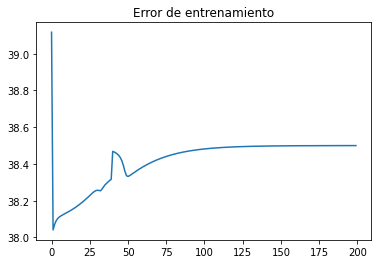

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errorVec)
plt.title("Error de entrenamiento")

In [ ]:
import math
def errorRNN(x,t):
  error=0
  emc=0
  for i in range(0,x.shape[0]):
    xi=x[i]
    ti=t[i]
    y,entredaNetaCS,entradaNetaC9, entradaNetaC8,entradaNetaC7, entradaNetaC6, entradaNetaC5, entradaNetaC4, entradaNetaC3, entradaNetaC2,entradaNetaC1=neurona(xi,pesosCO1,tc1,pesosCO2,tc2,pesosCO3,tc3, pesosCO4,tc4, pesosCO5,tc5,pesosCO6,tc6, pesosCO7,tc7,pesosCO8,tc8, pesosCO9,tc9, pesosCS, tcs)
    emc=pow((ti-y),2)/2
    if int(round(y[0],0))!=ti:
      error+=1
  error=(error/x.shape[0])*100
  return error, emc

In [ ]:
error, emc=errorRNN(x_test, y_test)
print(error,emc)

73.68421052631578 [0.49998427]


In [ ]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(neuronasC1, neuronasC2,neuronasC3, neuronasC4, neuronasC5, neuronasC6,neuronasC7,neuronasC8, neuronasC9 ),random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2, 6, 3, 4, 2, 5, 3, 2, 1),
              random_state=1, solver='lbfgs')

In [ ]:
clf.score(x_test, y_test)

0.5